In [2]:
import pandas as pd
import numpy as np
import os

os.listdir('./data')

['train.csv', 'test.csv']

In [3]:
train = pd.read_csv('./data/train.csv', na_values = ['-1','-1.0']) #additional na value
test = pd.read_csv('./data/test.csv', na_values = ['-1','-1.0'])

print('train shape : ', train.shape)
print('test shape : ', test.shape)

train shape :  (595212, 59)
test shape :  (892816, 58)


In [4]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     594996 non-null float64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595129 non-null float64
ps_ind_05_cat     589403 non-null float64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64

- 모든 변수들이 익명화되어 있다
- 데이터 타입은 int64, float64
- '_bin'는 binary / '_cat'은  categorical 변수

# target

In [6]:
train.target.unique()

array([0, 1])

In [24]:
print('{0:.3f} %'.format(sum(train.target ==  1) / len(train) * 100)) #imbalanced

3.645 %


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

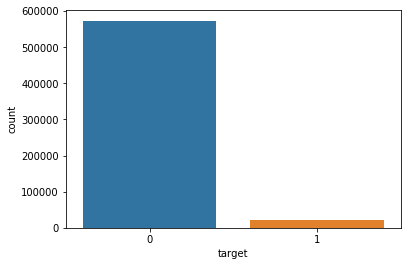

In [9]:
sns.countplot(train.target)

# Visualization

In [10]:
binary = []
category = []
integer = []
floats = []


for col in train.columns.values[2:] :
    if 'bin' in col :
        binary.append(col)
    elif 'cat' in col :
        category.append(col)
    elif 'ind' in col :
        integer.append(col)
    else :
        floats.append(col)

In [11]:
col = ['ps_car_11','ps_calc_04','ps_calc_05','ps_calc_06','ps_calc_07','ps_calc_08','ps_calc_09',
 'ps_calc_10','ps_calc_11','ps_calc_12','ps_calc_13','ps_calc_14']

integer = integer + col
floats = list(set(floats) - set(col))
floats

['ps_reg_03',
 'ps_car_12',
 'ps_calc_02',
 'ps_calc_03',
 'ps_car_13',
 'ps_reg_01',
 'ps_car_15',
 'ps_reg_02',
 'ps_calc_01',
 'ps_car_14']

In [12]:
test['target'] = np.nan
df = pd.concat([train, test], axis = 0)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [13]:
def bar_plot(col, data, hue = None) :
    f, ax = plt.subplots(figsize = (5,3))
    sns.countplot(x = col, hue = hue, data = data, alpha = 0.5)
    plt.show()
    
def dist_plot(col, data) :
    f, ax = plt.subplots(figsize = (5,3))
    sns.distplot(data[col].dropna(), kde = False, bins = 10)
    plt.show()

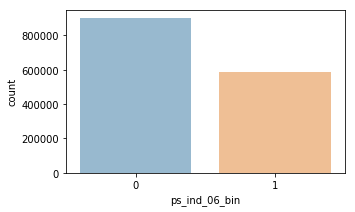

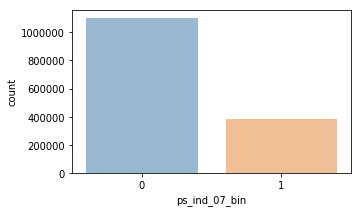

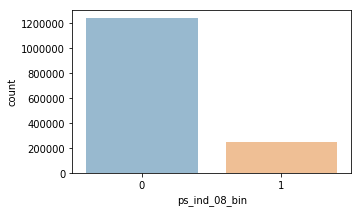

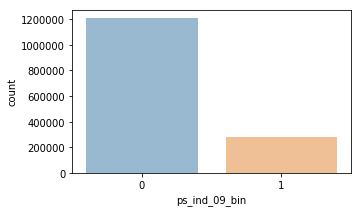

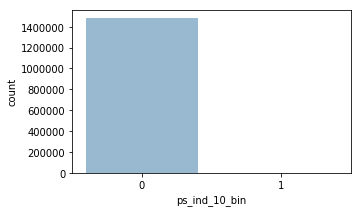

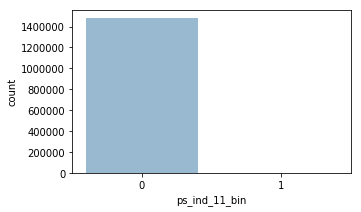

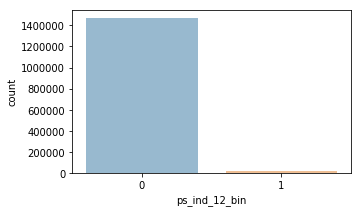

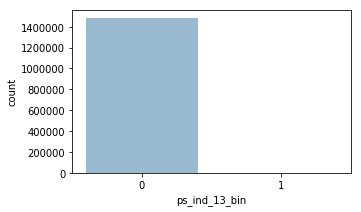

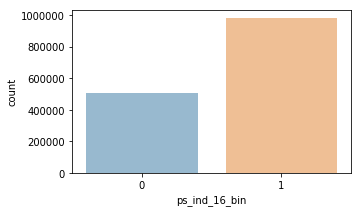

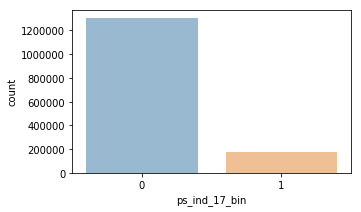

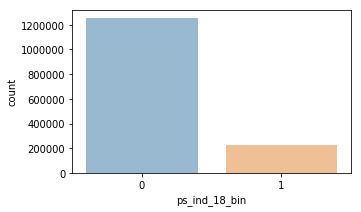

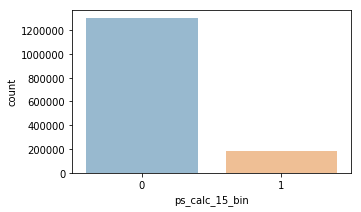

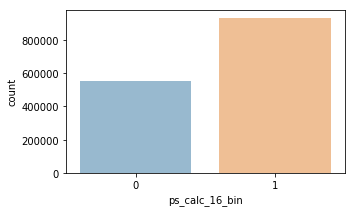

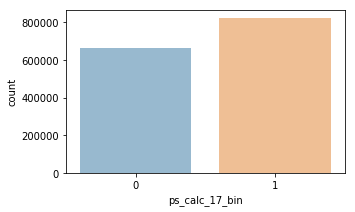

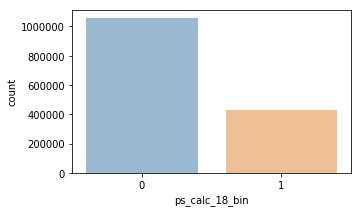

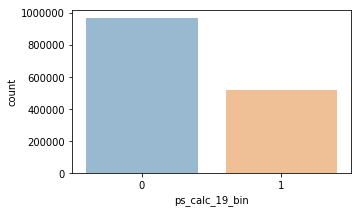

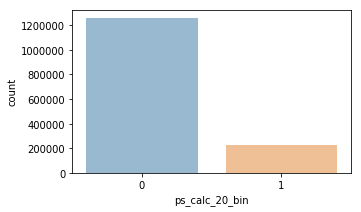

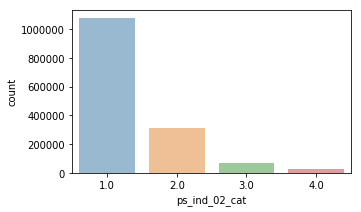

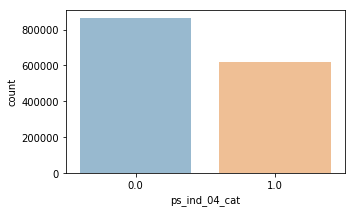

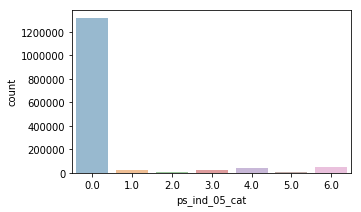

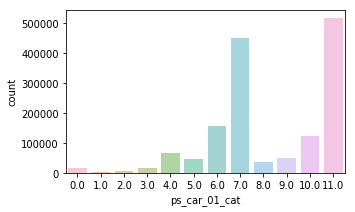

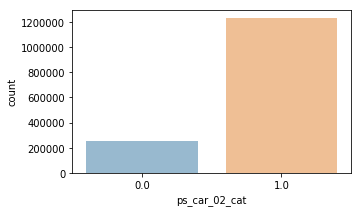

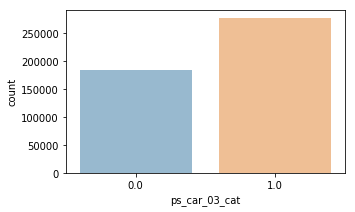

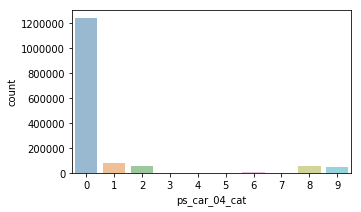

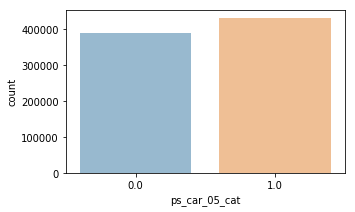

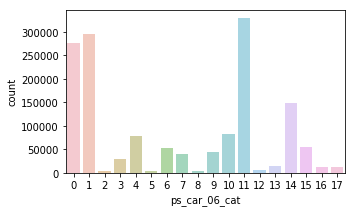

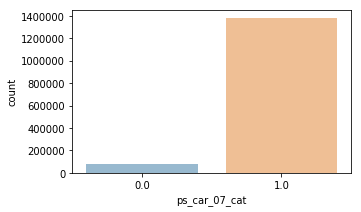

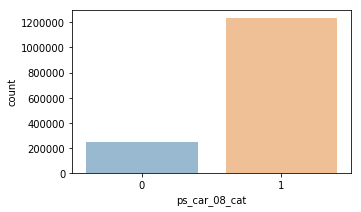

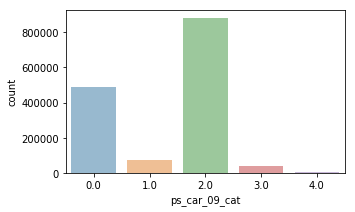

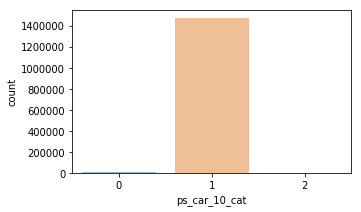

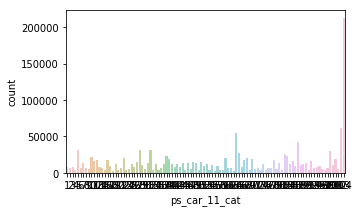

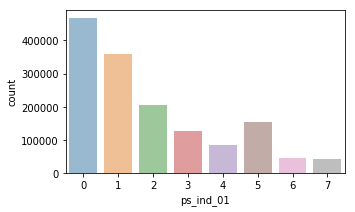

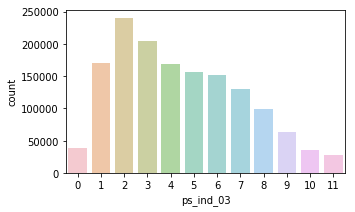

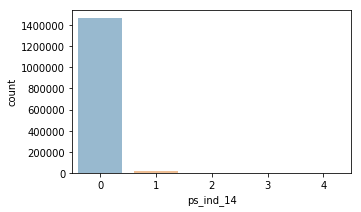

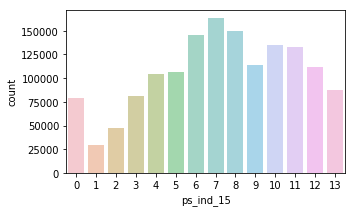

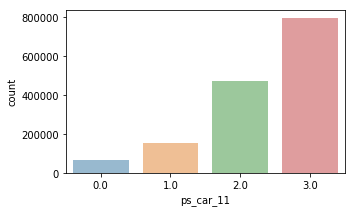

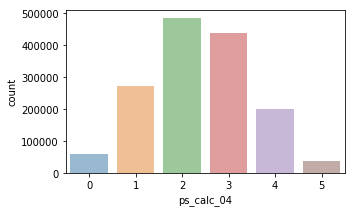

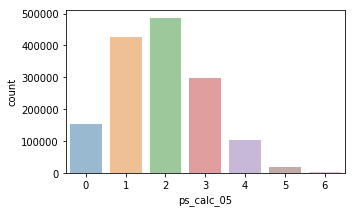

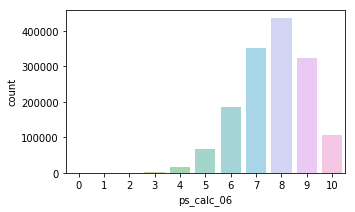

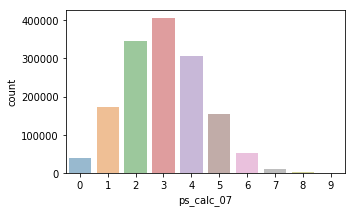

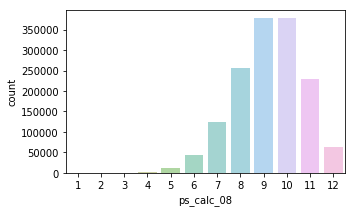

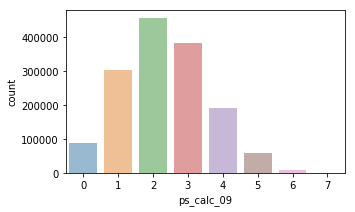

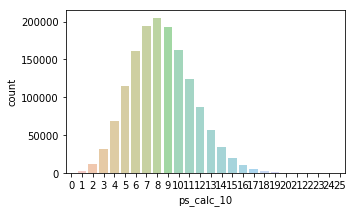

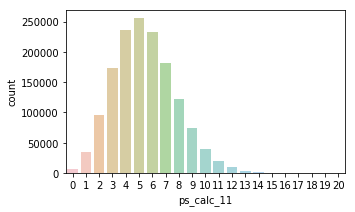

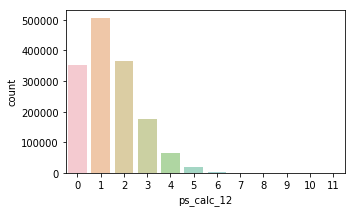

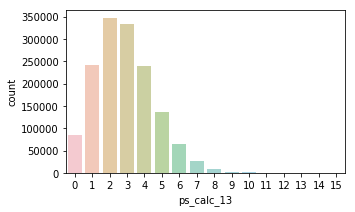

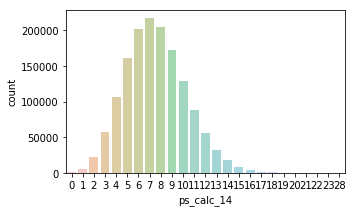

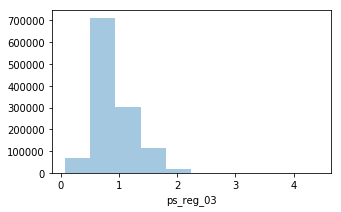

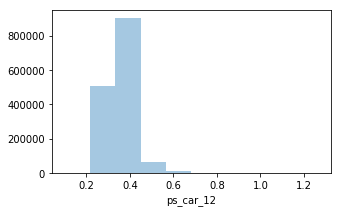

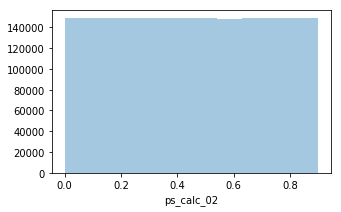

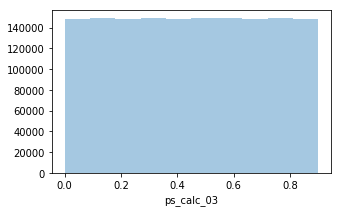

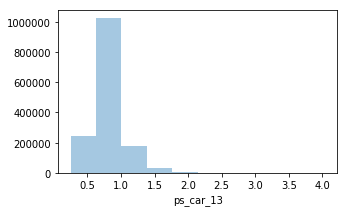

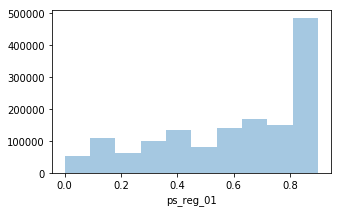

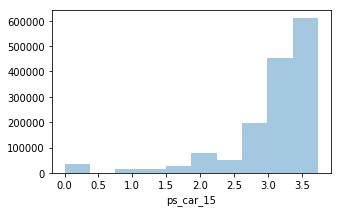

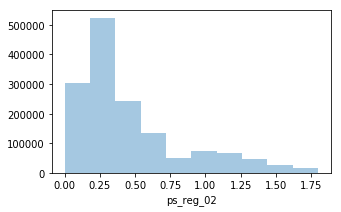

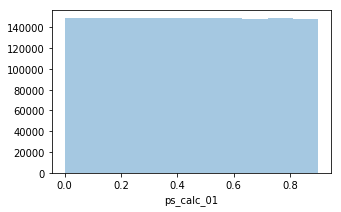

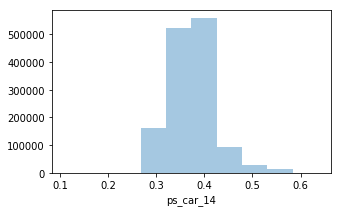

In [14]:
#binary, category, integer type data plot
for col in binary + category + integer :
    bar_plot(col, df)
    
for col in floats :
    dist_plot(col, df)

# correlation

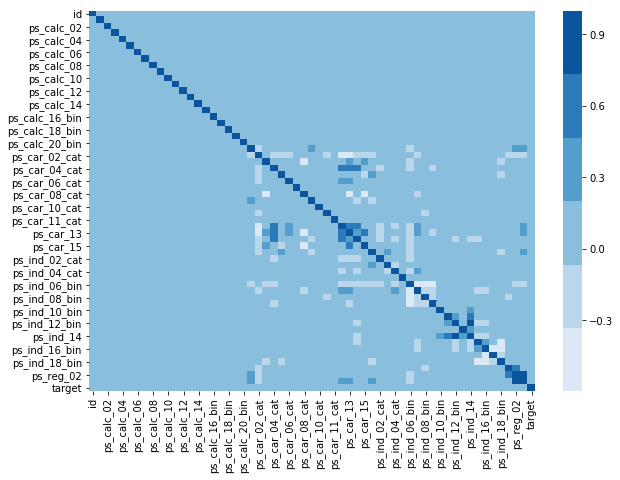

In [15]:
corr = df.corr()

cmap = sns.color_palette('Blues')
f,ax = plt.subplots(figsize = (10,7))
sns.heatmap(corr, cmap = cmap)

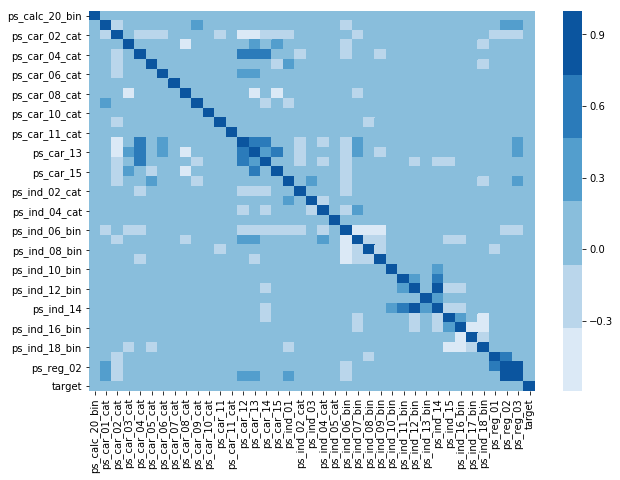

In [16]:
corr_sub = df[df.columns[20:]].corr()
f, ax = plt.subplots(figsize = (10,7))
sns.heatmap(corr_sub, cmap = cmap)

In [17]:
corr_series = pd.Series(index = df.columns)

for i, col in enumerate(df.columns) :
    corr_series[i] = corr[col].nlargest(2)[1]
corr_series.sort_values(ascending=False).head(15) 

ps_ind_14        0.889588
ps_ind_12_bin    0.889588
ps_reg_02        0.742668
ps_reg_03        0.742668
ps_car_12        0.672809
ps_car_13        0.672809
ps_car_14        0.602708
ps_car_04_cat    0.595692
ps_ind_11_bin    0.562800
ps_car_15        0.528719
ps_reg_01        0.470147
ps_ind_13_bin    0.436032
ps_car_03_cat    0.373244
ps_ind_07_bin    0.348026
ps_ind_16_bin    0.314597
dtype: float64

- 전체적으로 correlation이 매우 낮지만, 눈에 띄게 큰 값들이 몇 개 존재한다
- ps_ind_14, ps_ind_12_bin - > 0.889588

# single Variable - Target Value

In [18]:
def bar_plot_ci(col, data) :
    f,ax = plt.subplots(figsize = (5,3))
    sns.barplot(x = col, y = 'target', data = data)
    plt.show()

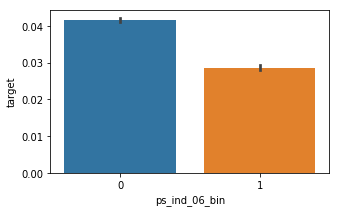

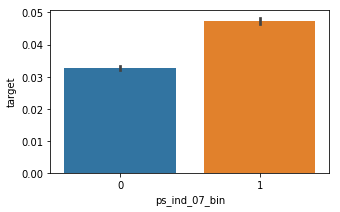

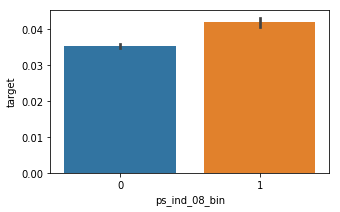

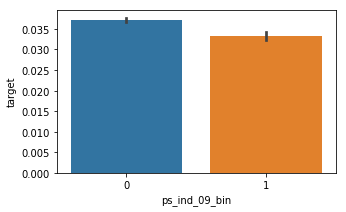

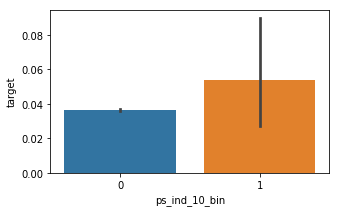

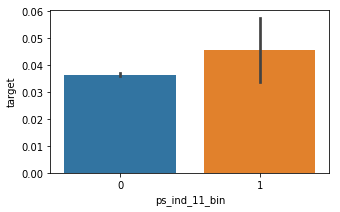

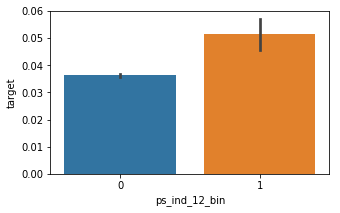

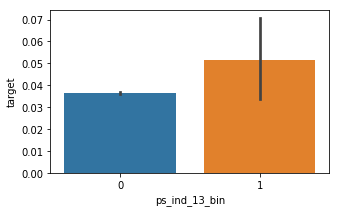

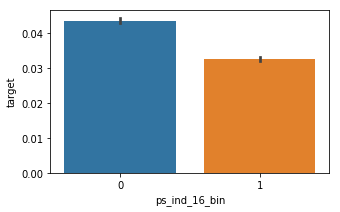

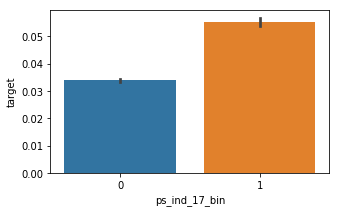

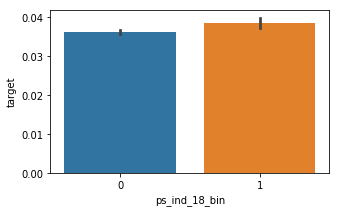

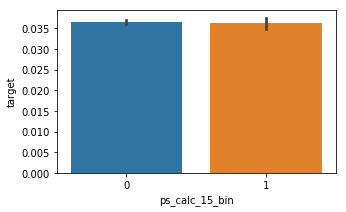

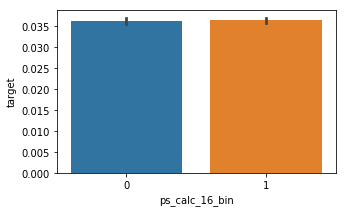

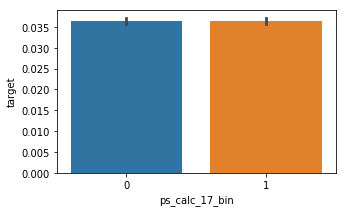

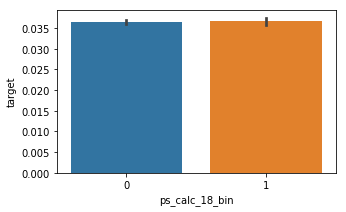

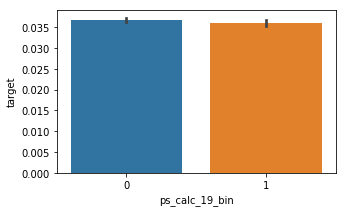

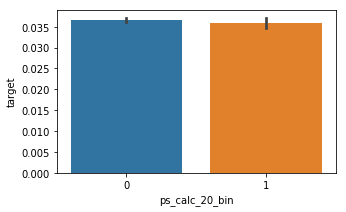

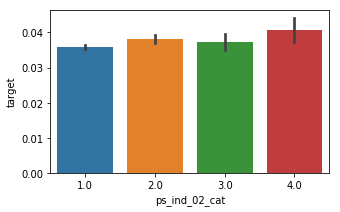

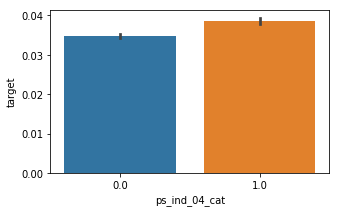

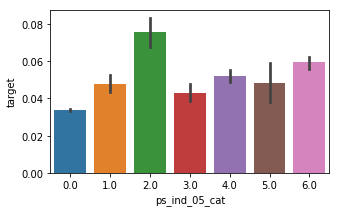

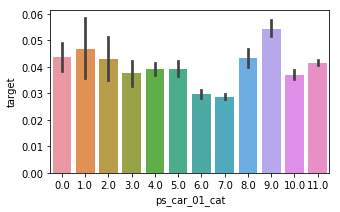

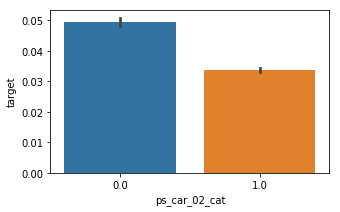

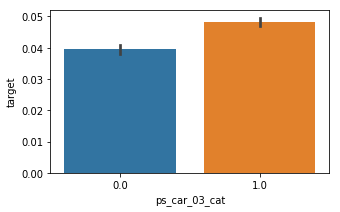

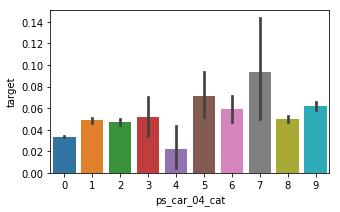

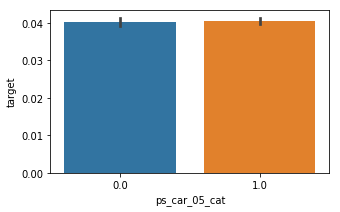

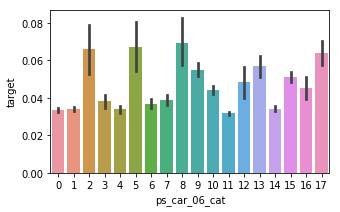

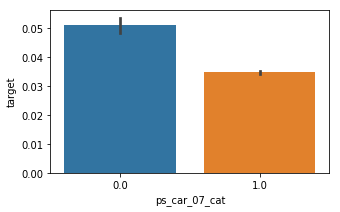

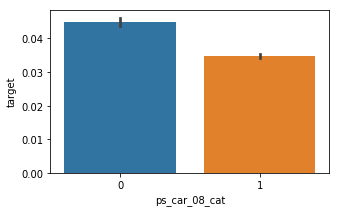

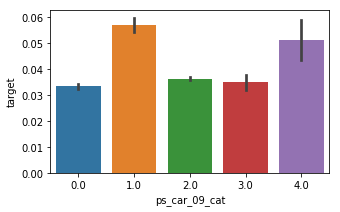

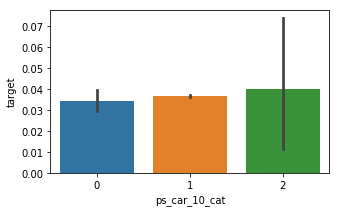

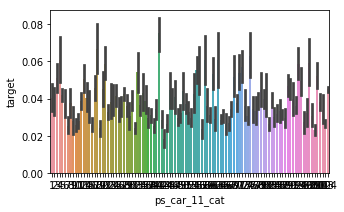

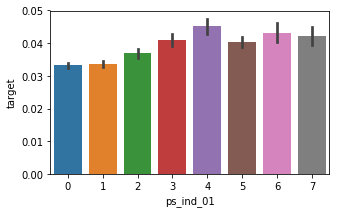

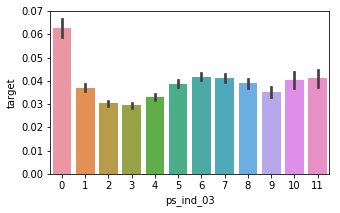

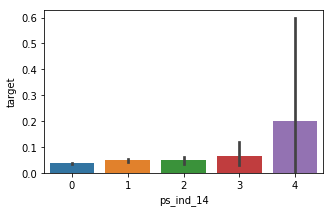

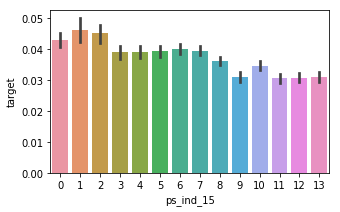

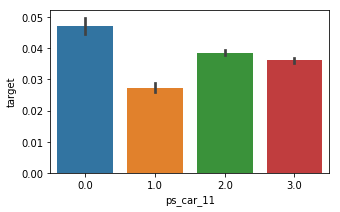

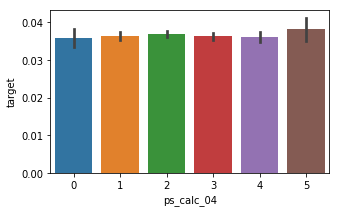

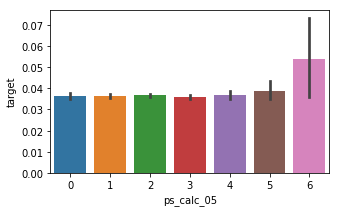

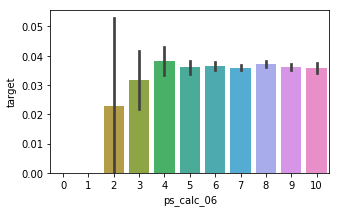

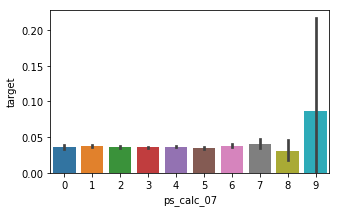

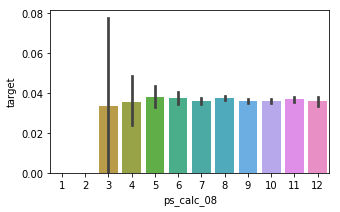

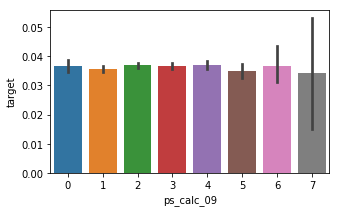

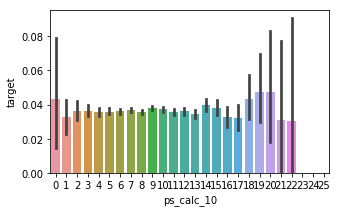

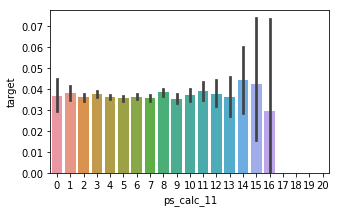

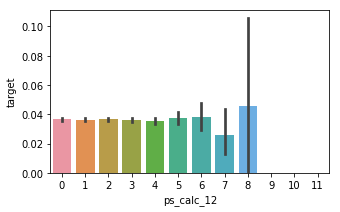

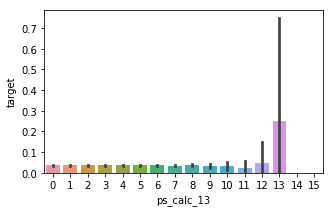

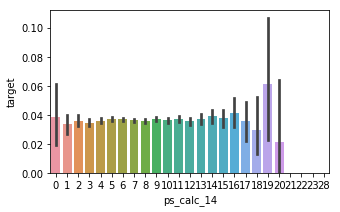

In [19]:
for col in binary + category + integer :
    bar_plot_ci(col, df)

- 검정선은 신뢰구간! 검정선이 길면 신뢰구간이 길다는 뜻
- 검정선이 겹치면, barplot이 차이가 커도 값들의 차이가 통계적으로 차이가 없다고 해석할 수 있다(ps_ind_11_bin)

# train vs test

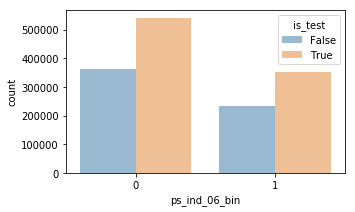

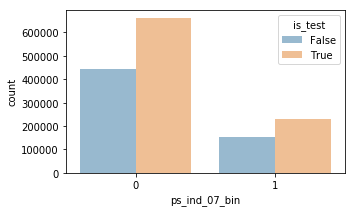

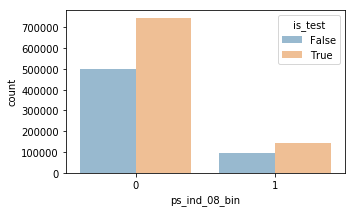

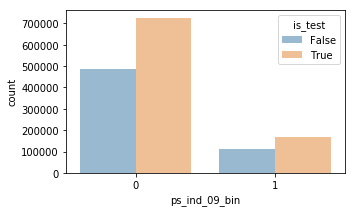

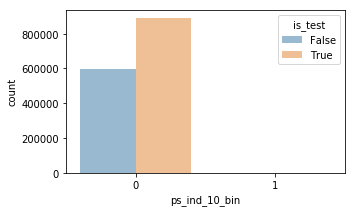

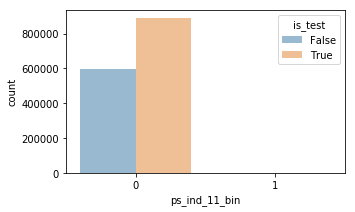

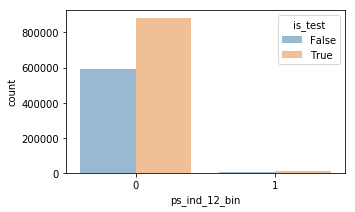

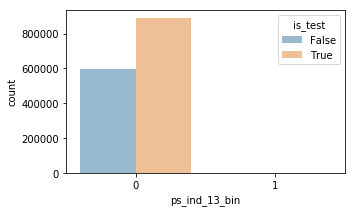

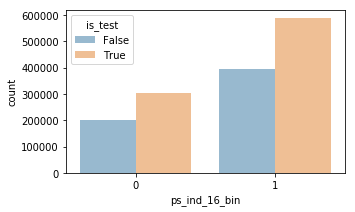

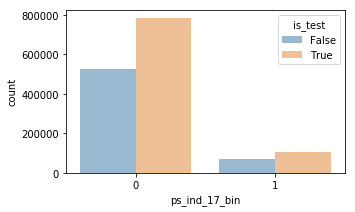

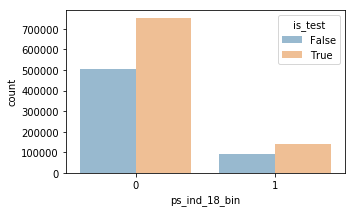

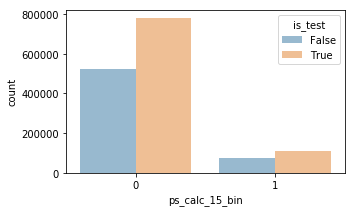

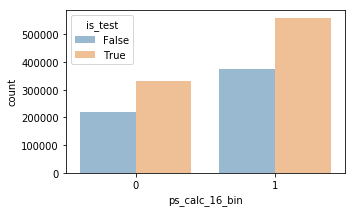

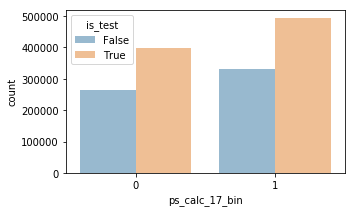

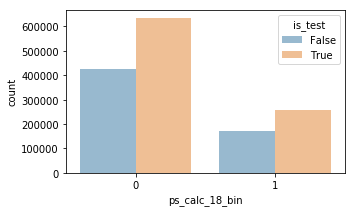

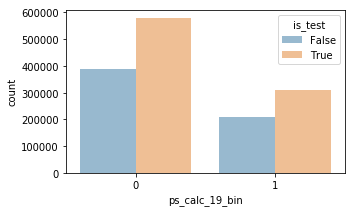

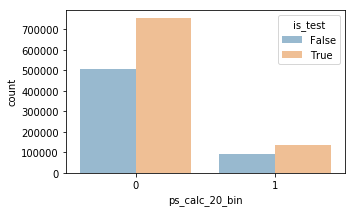

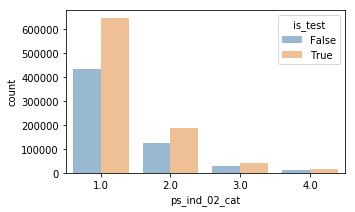

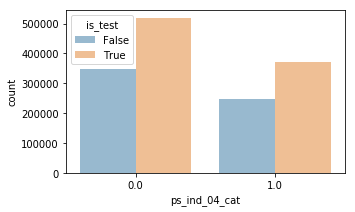

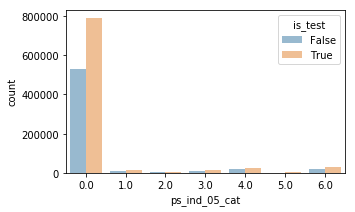

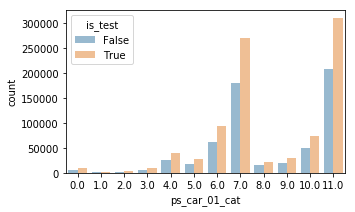

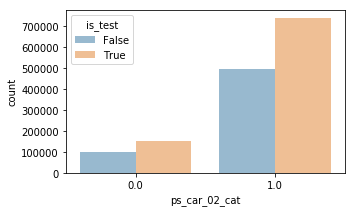

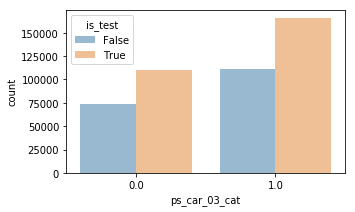

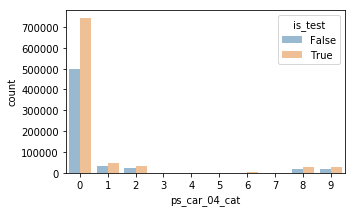

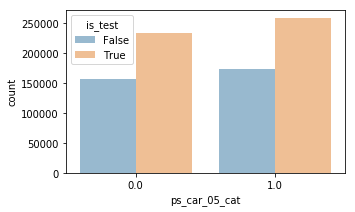

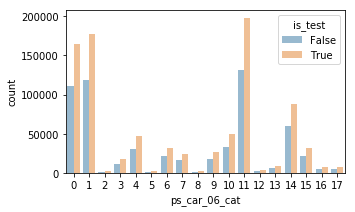

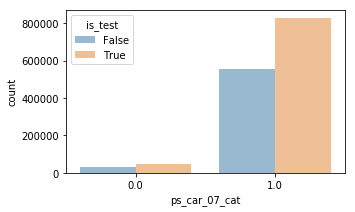

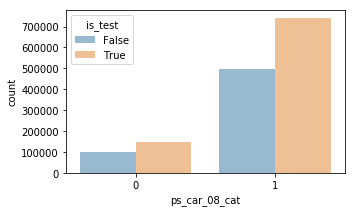

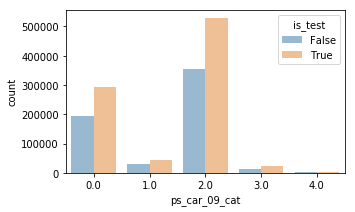

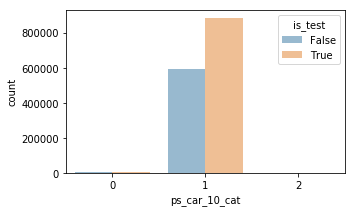

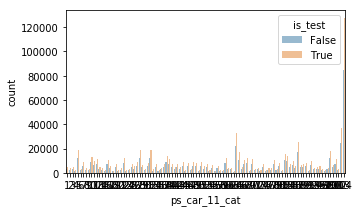

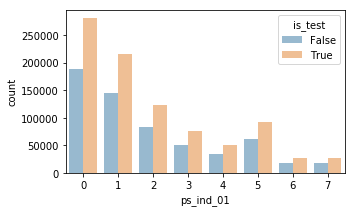

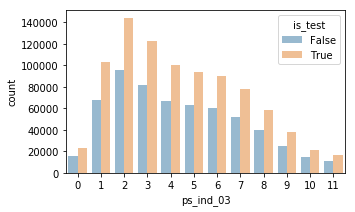

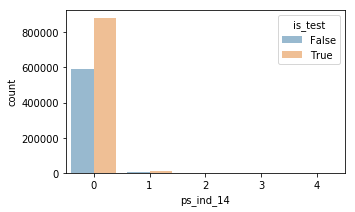

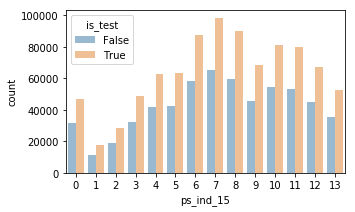

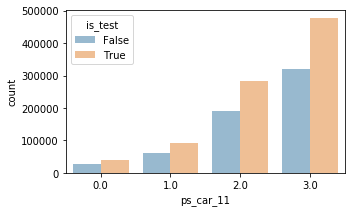

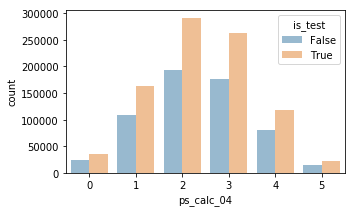

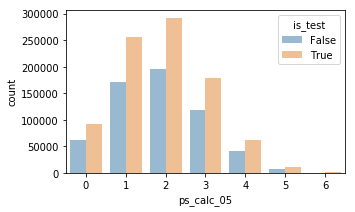

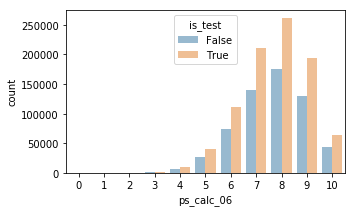

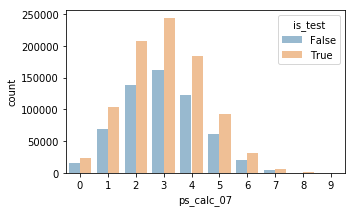

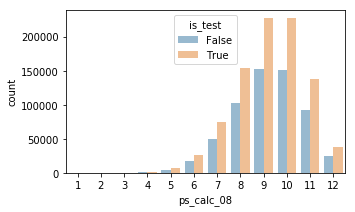

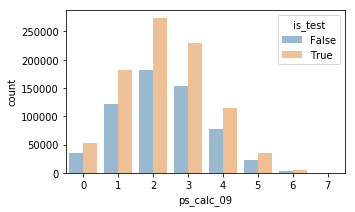

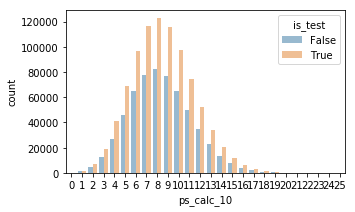

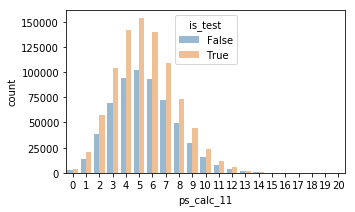

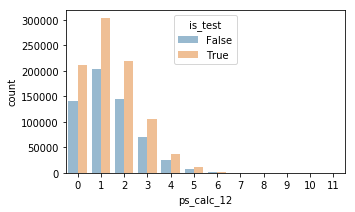

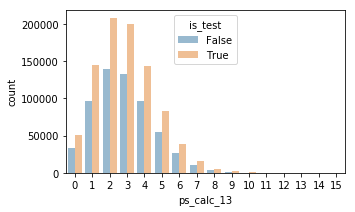

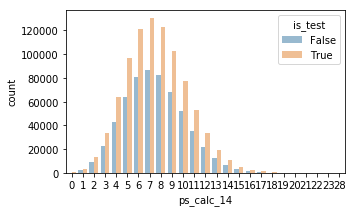

In [26]:
df['is_test'] = df.target.isnull()

for col in binary + category + integer :
    bar_plot(col, df,'is_test')

- train 과 test의 변수별 count plot을 그려보았다
- test의 데이터 수가 약 1.5배인데, 실제로 변수별 count도 1.5배!
- 비슷한 분포를 가짐을 알 수 있다